In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import LogisticRegression

In [ ]:
ads=pd.read_csv('advertising.csv')

In [ ]:
ads.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
ads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
ads.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


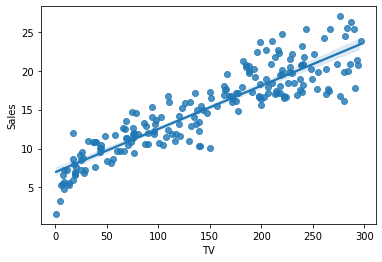

In [ ]:
sns.regplot(ads.TV,ads.Sales)

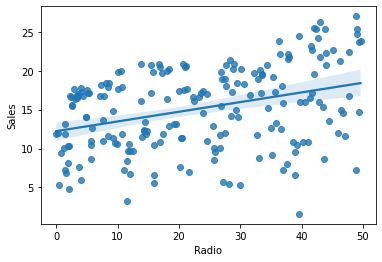

In [ ]:
sns.regplot(ads.Radio,ads.Sales)

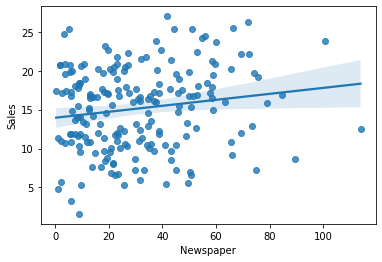

In [ ]:
sns.regplot(ads.Newspaper,ads.Sales)

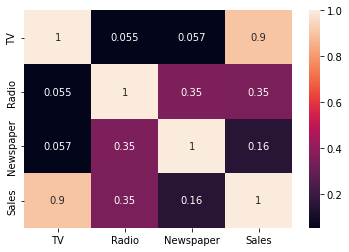

In [ ]:
sns.heatmap(ads.corr(),annot=True)

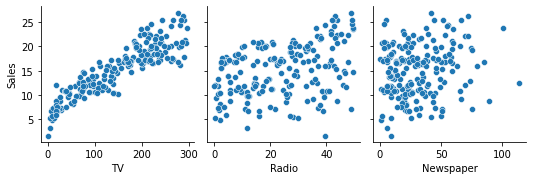

In [ ]:
sns.pairplot( data=ads, 
             x_vars=['TV','Radio','Newspaper'],y_vars='Sales')

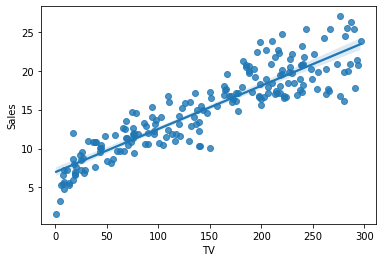

In [ ]:
sns.regplot(data=ads, x='TV',y='Sales')

### In our case we are using Simple Linear Regression
##  Y = m*TV+ c


# Steps
1. Create X and Y
2. Create train and Test set
3. Train Model on Training set to learn the coff 
4. Evaluate the model

In [ ]:
# -- X and Y 

X=ads['TV']
y=ads.Sales

In [ ]:
X.head()

0    230.1
1     44.5
2     17.2
3    151.5
4    180.8
Name: TV, dtype: float64

In [ ]:
# Train Test Split

X_train,X_test, y_train,y_test= train_test_split(X,y,test_size=.25,random_state=100,shuffle=True,)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(150,)
(50,)
(150,)
(50,)


In [ ]:
X_train

40     202.5
153    171.3
115     75.1
64     131.1
59     210.7
       ...  
87     110.7
103    187.9
67     139.3
24      62.3
8        8.6
Name: TV, Length: 150, dtype: float64

In [ ]:
# Training the Model


X_train_sm=sm.add_constant(X_train)

In [ ]:
X_train_sm.head()

,const,TV
40,1.0,202.5
153,1.0,171.3
115,1.0,75.1
64,1.0,131.1
59,1.0,210.7


## OLS means Ordinary Least Square

In [ ]:
lr= sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.params   

const    7.00822
TV       0.05425
dtype: float64

In [ ]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     666.4
Date:                Sat, 31 Dec 2022   Prob (F-statistic):           1.14e-56
Time:                        15:45:44   Log-Likelihood:                -340.57
No. Observations:                 150   AIC:                             685.1
Df Residuals:                     148   BIC:                             691.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0082      0.362     19.382      0.000       6.294       7.723
TV             0.0542      0.002     25.814      0.000       0.050       0.058
==============================================================================
Omnibus:                        0.006   Durbin-Watson:                   2.207
Prob(Omnibus):                  0.997   Jarque-Bera (JB):                0.042
Skew:                          -0.011   Prob(JB):                        0.979
Kurtosis:                       2.921   Cond. No.                         323.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

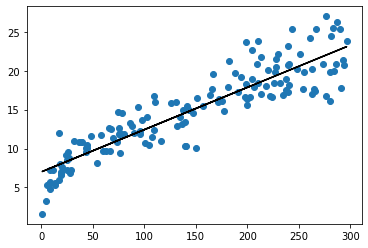

In [ ]:
y_train_prd= lr_model.predict(X_train_sm)
plt.scatter(X_train,y_train)
plt.plot(X_train, y_train_prd,'black')
plt.show()

## Residual Analysis

In [ ]:
y_train_prd

40     17.993828
153    16.301231
115    11.082389
64     14.120384
59     18.438677
         ...    
87     13.013686
103    17.201779
67     14.565233
24     10.387990
8       7.474769
Length: 150, dtype: float64

In [ ]:
res=y_train-y_train_prd

In [ ]:
res

40    -1.393828
153   -0.301231
115    1.517611
64     1.879616
59    -0.038677
         ...   
87     2.986314
103    2.498221
67    -1.165233
24    -0.687990
8     -2.674769
Length: 150, dtype: float64

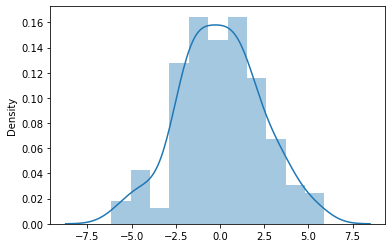

In [ ]:
sns.distplot(res)

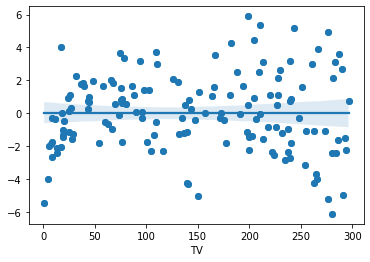

In [ ]:
plt.scatter(X_train,res)
sns.regplot(X_train,res)

## Predict and Evaluate the Test Set

In [ ]:
X_test_sm=sm.add_constant(X_test)

y_test_pred=lr_model.predict(X_test_sm)

In [ ]:
y_test_pred.head()

126     7.431369
104    19.930550
99     14.342809
92     18.818427
111    20.120425
dtype: float64

In [ ]:
r2=r2_score(y_train,y_train_prd)
print(r2*100)

81.82648087707635


In [ ]:
r2=r2_score(y_test,y_test_pred)
print(r2*100)

77.23404266389127


In [ ]:
MSE_test=mean_squared_error(y_train,y_train_prd)
print(MSE_test)

5.491046335600161


In [ ]:
MSE_test=mean_squared_error(y_test,y_test_pred)
print(MSE_test)

4.525508063101037


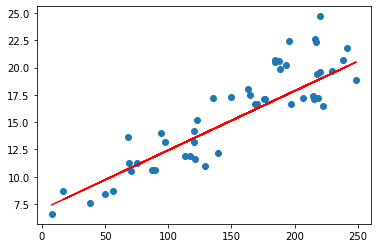

In [ ]:
plt.scatter(X_test,y_test)
plt.plot(X_test,y_test_pred,'r');

## Working on sklearn lib

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=.7,random_state=150)

In [ ]:
X_train_lm=X_train.values.reshape(-1,1)
X_test_lm=X_test.values.reshape(-1,1)

print(X_train_lm.shape)
print(X_test_lm.shape)
print(y_train.shape)
print(y_test.shape)

(140, 1)
(60, 1)
(140,)
(60,)


In [ ]:
lm=LinearRegression()
lm.fit(X_train_lm,y_train)

LinearRegression()

In [ ]:
lm.coef_

array([0.05655274])

In [ ]:
lm.intercept_

6.914407992283916

In [ ]:
# Prediction

y_train_pred=lm.predict(X_train_lm)
y_test_pred=lm.predict(X_test_lm)

In [ ]:
r2_train=r2_score(y_train,y_train_pred)
r2_test=r2_score(y_test,y_test_pred)

In [ ]:
print("Train R2-->", r2_train)
print("Test R2-->",r2_test)

Train R2--> 0.814308143207914
Test R2--> 0.8063513072497018
